In [61]:
import lib as lib
from inputs import *
import numpy as np
import matplotlib.pyplot as plt

# Analysis of the numerical derivative in E_local for He

We analyse the error of the numerical derivative in 'E_local' for He with one parameter in the wave-function. 

The error is calcualted as the absolute difference between the analytic function and the function with the numerical derivate. 

We plot the error as a function of 'h' (step for the numerical derivative) for three different points and we also plot E(alpha) as a function of 'h'. 

In [62]:
# Input parameters
prob_density = prob_density_Helium_atom_GS_1param
dim = 6
alpha = np.array([0.15])

N_steps = 5000
N_walkers = 100
N_skip = 300
L_start = 5

## Specific points r

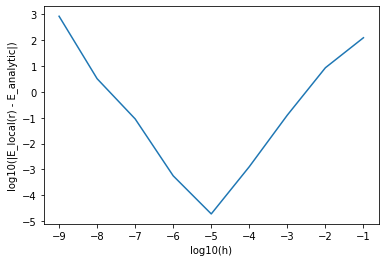

In [63]:
# position close to origin and electrons close together
r0 = np.array([[[0.01, 0.01, 0.01, -0.01, -0.01, -0.01]]])

actual_E = E_local_Helium_atom_GS_1param_analytic(r0, alpha).flatten()

h_LIST = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7, 1E-8, 1E-9]
error_LIST = []

for h in h_LIST:
    error_LIST += [np.abs(E_local_Helium_atom_GS_1param_numeric(r0, alpha, h=h).flatten() - actual_E)]

plt.plot(np.log10(h_LIST), np.log10(error_LIST))
plt.xlabel("log10(h)")
plt.ylabel("log10(|E_local(r) - E_analytic|)")
plt.show()

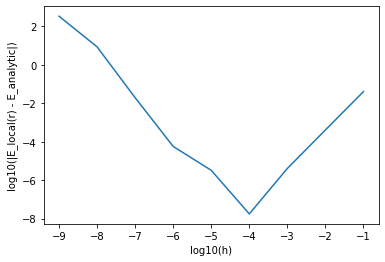

In [64]:
# position not very far from origin
r0 = np.array([[[0.5, 0.5, 0.5, -0.5, -0.5, -0.5]]])

actual_E = E_local_Helium_atom_GS_1param_analytic(r0, alpha).flatten()

h_LIST = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7, 1E-8, 1E-9]
error_LIST = []

for h in h_LIST:
    error_LIST += [np.abs(E_local_Helium_atom_GS_1param_numeric(r0, alpha, h=h).flatten() - actual_E)]

plt.plot(np.log10(h_LIST), np.log10(error_LIST))
plt.xlabel("log10(h)")
plt.ylabel("log10(|E_local(r) - E_analytic|)")
plt.show()

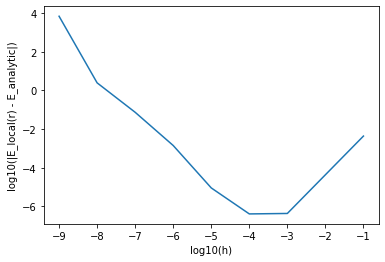

In [65]:
# position very far from origin
r0 = np.array([[[2, 2, 2, -2, -2, -2]]])

actual_E = E_local_Helium_atom_GS_1param_analytic(r0, alpha).flatten()

h_LIST = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7, 1E-8, 1E-9]
error_LIST = []

for h in h_LIST:
    error_LIST += [np.abs(E_local_Helium_atom_GS_1param_numeric(r0, alpha, h=h).flatten() - actual_E)]

plt.plot(np.log10(h_LIST), np.log10(error_LIST))
plt.xlabel("log10(h)")
plt.ylabel("log10(|E_local(r) - E_analytic|)")
plt.show()

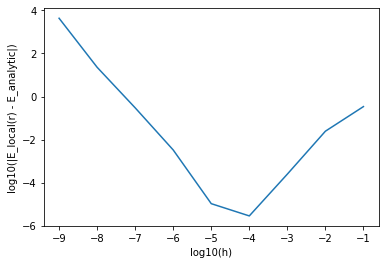

In [66]:
# position far from to origin but electrons close together
r0 = np.array([[[1, 1, 1, 1.05, 1.05, 1.05]]])

actual_E = E_local_Helium_atom_GS_1param_analytic(r0, alpha).flatten()

h_LIST = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7, 1E-8, 1E-9]
error_LIST = []

for h in h_LIST:
    error_LIST += [np.abs(E_local_Helium_atom_GS_1param_numeric(r0, alpha, h=h).flatten() - actual_E)]

plt.plot(np.log10(h_LIST), np.log10(error_LIST))
plt.xlabel("log10(h)")
plt.ylabel("log10(|E_local(r) - E_analytic|)")
plt.show()

Therefore, from these results the best option should be a h between 1E-4 and 1E-5. 

## E(alpha)

In [67]:
init_points = lib.rand_init_point(L_start, dim, N_walkers)
trial_move = lib.find_optimal_trial_move(prob_density, alpha, dim, 2.5)
steps = lib.random_walkers(prob_density, alpha, N_steps, init_points, trial_move)[0]

In [68]:
# analytic value for the given steps
E_alpha_walkers = lib.MC_average_walkers(E_local_Helium_atom_GS_1param_analytic, steps, alpha)
E_alpha_analytic = np.average(E_alpha_walkers)

h= 1e-09  



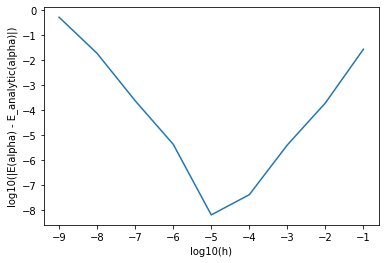

In [69]:
# numerical derivative
h_LIST = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7, 1E-8, 1E-9]
error_LIST = []

for h in h_LIST:
    print("h=", h, "\r", end="")
    E_local = E_local_Helium_atom_GS_1param_numeric(steps, alpha, h=h)
    E_alpha_walkers = np.average(E_local, axis=0)
    E_alpha_h = np.average(E_alpha_walkers)
    error_LIST += [np.abs(E_alpha_analytic - E_alpha_h)]

print("\n")
    
plt.plot(np.log10(h_LIST), np.log10(error_LIST))
plt.xlabel("log10(h)")
plt.ylabel("log10(|E(alpha) - E_analytic(alpha)|)")
plt.show()

Therefore, the best option is to choose h=1E-5.